In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
data=pd.read_csv('abalone.csv')
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
#changing the categorical data
data.v1[data.v1=='M']=1
data.v1[data.v1=='F']=2
data.v1[data.v1=='I']=3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data.dtypes

v1        object
v2       float64
v3       float64
v4       float64
v5       float64
v6       float64
v7       float64
v8       float64
Rings      int64
dtype: object

In [10]:
data.describe()

,v2,v3,v4,v5,v6,v7,v8,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
v1       4177 non-null object
v2       4177 non-null float64
v3       4177 non-null float64
v4       4177 non-null float64
v5       4177 non-null float64
v6       4177 non-null float64
v7       4177 non-null float64
v8       4177 non-null float64
Rings    4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [12]:
data.isnull().sum()

v1       0
v2       0
v3       0
v4       0
v5       0
v6       0
v7       0
v8       0
Rings    0
dtype: int64

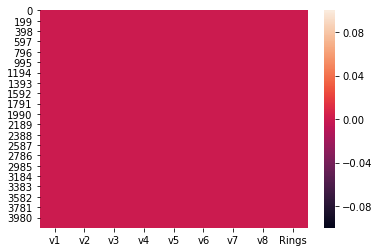

In [14]:
sns.heatmap(data.isnull())

In [15]:
#sns.pairplot(data)

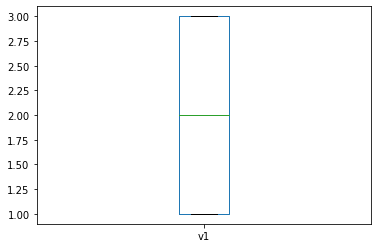

In [16]:
data["v1"].plot.box()

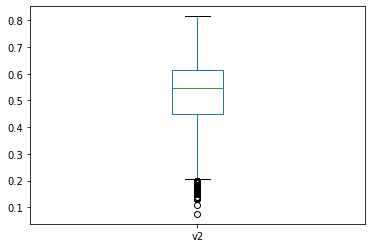

In [17]:
data["v2"].plot.box()

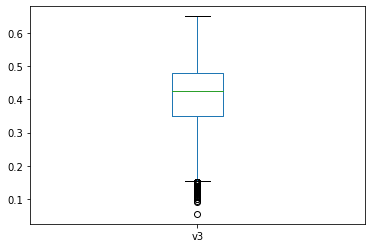

In [18]:
data["v3"].plot.box()

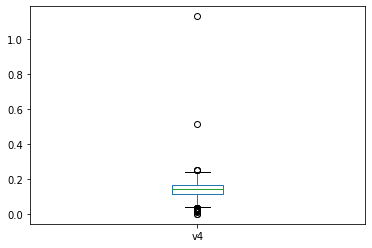

In [19]:
data["v4"].plot.box()

In [20]:
data.shape

(4177, 9)

In [21]:
data.corr()

,v2,v3,v4,v5,v6,v7,v8,Rings
v2,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
v3,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
v4,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
v5,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
v6,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
v7,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
v8,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


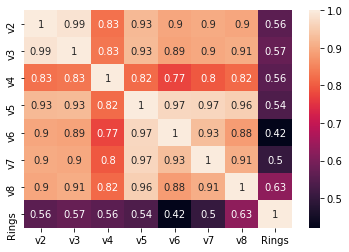

In [22]:
sns.heatmap(data.corr(),annot=True)

In [23]:
x=data.drop("Rings",axis=1)
x.head()

,v1,v2,v3,v4,v5,v6,v7,v8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [24]:
y=data["Rings"]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=41)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3299, 8)
(878, 8)
(3299,)
(878,)


In [27]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.5447010156734574

In [28]:
pred=lm.predict(x_test)
pred

array([11.24861514, 14.23812604,  6.13980459, 11.44778471,  9.57410457,
       10.5351024 ,  9.99936675,  7.90262777, 10.71535155,  8.68559705,
       10.18871961,  7.32273949, 10.81290216,  8.84393486, 13.42097019,
       12.58212192, 13.66266546,  6.28099473, 10.35921824,  9.52827732,
        7.9200021 ,  9.00621231,  8.68677389,  8.38718408, 12.5213703 ,
        6.65087788,  9.77948716, 15.43545673, 10.72141209, 11.33857141,
        7.81521928,  9.6718243 ,  6.60911439, 11.75163441, 10.54420384,
        7.50899059,  9.75679163,  7.96898556, 10.77437641,  8.82166661,
       10.27794512,  8.53497092,  8.87250443, 17.23402963,  6.4895613 ,
        9.78814044,  8.10808759,  9.57538371, 11.13560859,  7.93907956,
       10.59674465,  9.70909952, 12.16260337, 10.51493129,  8.87715478,
       10.04190075, 12.03288431,  9.8075608 , 11.12872538,  6.53887126,
       10.73418544, 14.02377573,  6.53433631, 14.78865173, 12.53115572,
        8.98550643,  8.8556924 ,  8.35637129, 10.58323653,  8.09

In [29]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
999,11,11.248615
192,14,14.238126
3523,4,6.139805
857,12,11.447785
861,12,9.574105
3486,8,10.535102
1803,10,9.999367
1458,7,7.902628
1644,10,10.715352
2423,10,8.685597


In [30]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print(r2_score(y_test,pred))

0.4620175419764112


In [31]:
pred=dtc.predict(x_test)
pred

array([10., 13.,  5., 15., 12.,  9., 10.,  8.,  9.,  7., 12.,  7., 10.,
       10., 16., 15., 10.,  6., 10.,  9.,  7., 10.,  9.,  6., 20.,  7.,
        9., 16., 17., 10.,  6., 11.,  6., 10., 10.,  6., 15., 13.,  8.,
        8., 13.,  6.,  8., 19.,  6.,  9.,  8., 10., 10.,  6.,  8.,  8.,
       15., 10.,  9.,  9.,  8., 11.,  9.,  6., 11., 20.,  6., 18., 10.,
       10.,  6.,  9.,  8.,  9.,  8.,  9.,  6.,  7., 10.,  9., 10.,  8.,
       11.,  9., 13.,  9.,  9.,  7., 11.,  6., 11.,  7.,  6., 13., 11.,
        7.,  9., 13., 12.,  8., 13., 11.,  9., 12., 17., 14., 11., 11.,
       19.,  7., 10.,  9.,  9., 10., 11.,  9., 16.,  9.,  7., 14.,  8.,
        7.,  7., 10., 11., 11., 10.,  7.,  5.,  9., 11., 11., 18., 14.,
        6.,  9.,  5.,  7., 11., 15., 12.,  8.,  6., 10., 11.,  7., 10.,
       11., 11.,  9., 12.,  9.,  4., 12., 11.,  6.,  6., 11., 16.,  6.,
        9., 13.,  6., 10.,  9.,  7., 10., 21., 13.,  9.,  6., 18.,  8.,
       13.,  5., 11., 10., 12.,  8., 12.,  7., 15., 15.,  9.,  9

In [32]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
999,11,10.0
192,14,13.0
3523,4,5.0
857,12,15.0
861,12,12.0
3486,8,9.0
1803,10,10.0
1458,7,8.0
1644,10,9.0
2423,10,7.0


In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
r2_score(y_train,rfr.predict(x_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9118846145180081

In [34]:
pred=rfr.predict(x_test)
pred

array([ 9.6, 14.6,  5.6, 11.3, 11. , 11.4, 11.1,  8.2,  9.7, 10.3, 11.8,
        7.1, 10.2,  9.1, 16.8, 16.1, 14.2,  7. , 10.3,  9.7,  7.4,  9.6,
        9.1,  8.3, 13.7,  6.2, 10.3, 15.2, 13.9, 11.8,  8.8, 10.5,  6.2,
       10.5,  9.9,  6.5, 10. , 11.1, 12.1,  9. , 11.5,  7.3,  8. , 13.9,
        5.8,  9.1,  9.1, 10. , 10.4,  7.6,  9.1, 10.2, 12.5, 10.6,  9. ,
        9.4, 10. , 11.4, 10.1,  7.5, 11.9, 14.3,  6.3, 18. , 13.4, 10.5,
        8. ,  8. , 15.3,  7.9,  8.8,  8.7,  6.7,  7.2, 10.1,  7.8, 11.5,
        9.1,  9. ,  8.1, 10.9, 12.7, 12. ,  6.6,  9.8,  6.5,  9.6,  7.2,
        9.1, 12. , 11. ,  8.6, 10.4, 12.4,  9.5,  9.9, 10.2, 10.3,  9.2,
       11.7, 14. ,  9.6, 12.8,  9.7, 12.3,  8. , 10.4,  6.9,  8.6, 10.2,
       10.3, 12.5, 16.2,  7.5,  7. , 10.7, 10.3,  8.2,  7.8, 12.2,  8.9,
       11.4, 14.3,  7.1,  6.2, 11.5, 11.3, 13.5, 12.3, 13.3,  6.6,  8.5,
        5.6,  7.7, 12. , 14.6,  9.9,  9.2,  7.8,  9.9,  9.7,  6. , 12.1,
       10.7,  9.9, 11.9, 11.7, 10.4,  3.3,  9.8, 11

In [35]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
999,11,9.6
192,14,14.6
3523,4,5.6
857,12,11.3
861,12,11.0
3486,8,11.4
1803,10,11.1
1458,7,8.2
1644,10,9.7
2423,10,10.3


In [36]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 1.677220956719818
Mean Squared Error: 5.71255125284738
Root Mean Squared Error: 2.3900944024969766
